In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
sns.set(color_codes =True)
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Read the csv using pandas
MiniProjectDiabetes = pd.read_csv("/Users/faez/Downloads/git-institute-of-data/mini Projects/project 1/MiniProjectdiabetes.csv")

DATA EXPLORATION
The dataset being used to test our hypothesis is a sample from the National Institute of Diabetes from a population in Arizona USA

In [3]:
# Top 5
MiniProjectDiabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Dimensions of dataset
MiniProjectDiabetes.shape

(768, 9)

In [5]:
# Info about the dataset
MiniProjectDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From above you can see all Columns defined are numerical
The column 'Outcome'(if positive for diabetes or not) is the 'target' variable. It has been marked as numerical when it should be categorical variable, however we will leave it as numerical
The predictor or dependent variables are 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
'BMI', 'DiabetesPedigreeFunction', 'Age'

In [6]:
# Lets look at the Descriptive Stats for the dataset.
# We'll transpose the outcome so that it's easier to read the output
MiniProjectDiabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# From the data info it can be seen that all the data is numeric.
# We can check for descrepancies to see if there is any non-numeric or missing data
# np.isreal : Determines whether each element of array is real.
# applymap:   applymap works element-wise on a DataFrame.
# all(1)   :   used to find rows where all the values are True
# ~ returns the inverse of the result
# basically you are saying show me all rows in MiniProjectDiabetes that have values that are non-numeric
MiniProjectDiabetes[~MiniProjectDiabetes.applymap(np.isreal).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Cleaning the data
The description of the dataset shows that Blood Pressure, Glucose, Skin Thickness, Insulin, BMI all have minimum values of 'zero'. Looks like they null values have been entered as 'zero'.  Since this is not possible we need to replace them with something more indicative of the data.  I will choose to replace these zero values with the mean of each of these columns.


In [8]:
# replace all the zero values in Blood Pressure, Glucose, Skin Thickness, Insulin, BMI with NAN
MiniProjectDiabetes[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=MiniProjectDiabetes[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)

# Now check the counts as a result of these substitutions
MiniProjectDiabetes.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
# replace all the NAN values in Blood Pressure, Glucose, Skin Thickness, Insulin, BMI with the mean
MiniProjectDiabetes['Glucose'].fillna(MiniProjectDiabetes['Glucose'].mean(), inplace = True)
MiniProjectDiabetes['BloodPressure'].fillna(MiniProjectDiabetes['BloodPressure'].mean(),inplace=True)
MiniProjectDiabetes['SkinThickness'].fillna(MiniProjectDiabetes['SkinThickness'].mean(),inplace=True)
MiniProjectDiabetes['Insulin'].fillna(MiniProjectDiabetes['Insulin'].mean(),inplace=True)
MiniProjectDiabetes['BMI'].fillna(MiniProjectDiabetes['BMI'].mean(),inplace=True)

In [10]:
# was substitution successful?
MiniProjectDiabetes.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

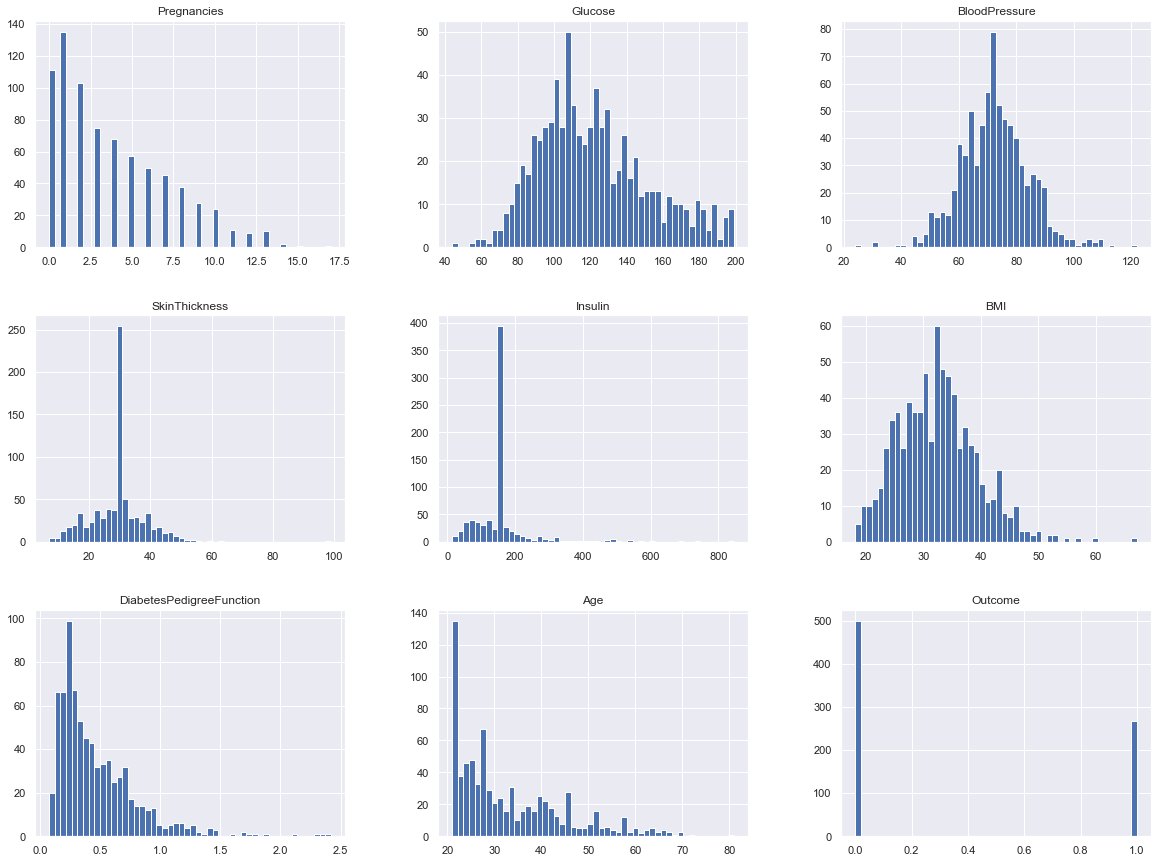

In [11]:
# lets have a look at how each of the features are distributed
MiniProjectDiabetes.hist(bins=50, figsize=(20, 15))
plt.show()

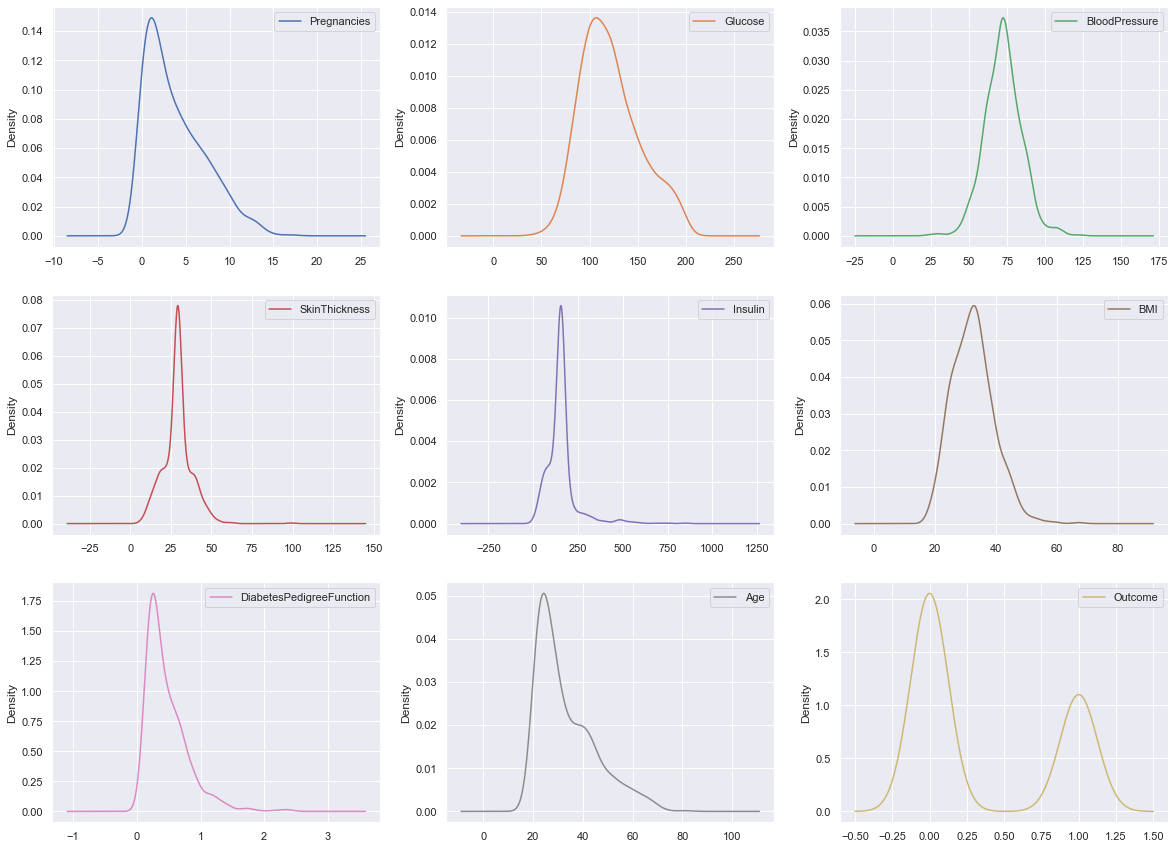

In [12]:
# Density plots for each feature to visualize the distribution for each feature
MiniProjectDiabetes.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

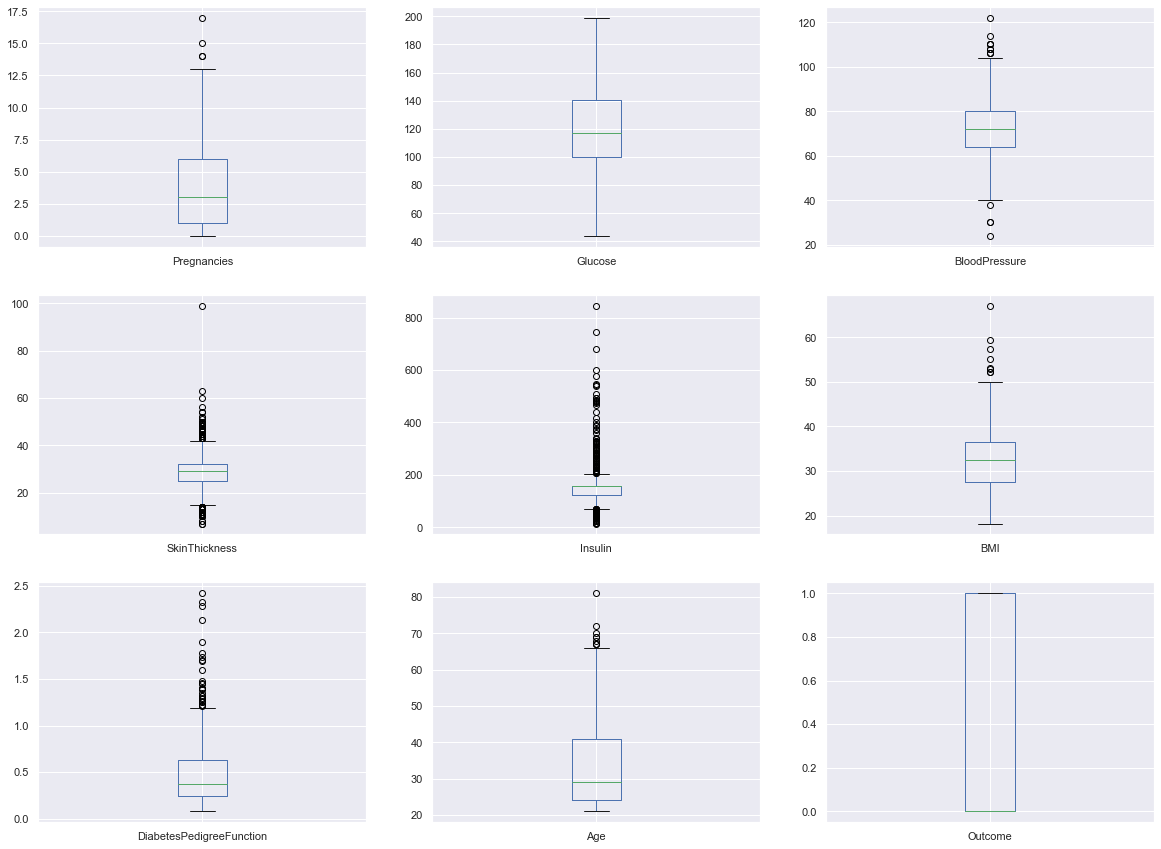

In [13]:
# Box and Whisker plot to visualize the distribution of all atributes
MiniProjectDiabetes.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

In [14]:
# Correlation between the different features
corr_diabetes = MiniProjectDiabetes.corr(method='pearson')
corr_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


<AxesSubplot:>

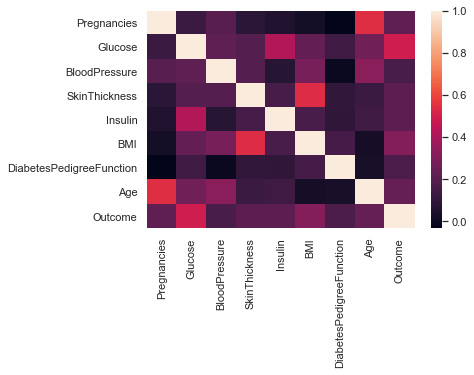

In [15]:
sns.heatmap(corr_diabetes)

From the above output no two factors have a strong linear relationships
'Age & Pregnancies', 'BMI & Skin Thickness' have a moderate positive linear relationship
whilst 'Glucose & Insulin' technically have a low correlation however for this case because 0.58 is so 
close to 0.6 it could be assumed as a moderate correlation

In [16]:
MiniProjectDiabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

The number of women who don't have diabetes = 500 i.e Outcome = 1
Number of women who  have diabetes = 268 i.e Outcome = 0

In [17]:
# Lets compute percentage of diabetic and non-diabetic in the dataset
nondiabetic=len(MiniProjectDiabetes[MiniProjectDiabetes.Outcome==1])
diabetic=len(MiniProjectDiabetes[MiniProjectDiabetes.Outcome==0])
Total=nondiabetic + diabetic
percent_diabetic = (diabetic*100)/Total
percent_nondiabetic = (nondiabetic*100)/Total
percent_diabetic, percent_nondiabetic

(65.10416666666667, 34.895833333333336)

Text(0.5, 1.0, 'The number of women with No Diabetes and Diabetes')

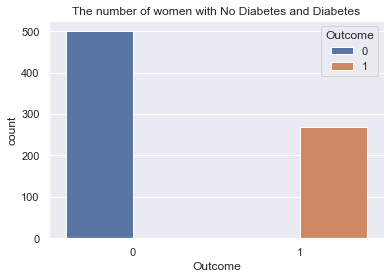

In [18]:
## creating count plot with title using seaborn
sns.countplot(x = 'Outcome', hue = "Outcome", data = MiniProjectDiabetes)
plt.title("The number of women with No Diabetes and Diabetes")


Our Null hypothesis H0: There is no significant relationship between Pregnancies and Outcome

Our Alternative hypothesis H1: There is significant relationship between Pregnancies and Outcome
    

In [19]:
# split data into two sets for the purposes of this hypothesis diabetes = 1 and diabetes = 0
diabetes_positive = MiniProjectDiabetes[MiniProjectDiabetes.Outcome==1]
diabetes_negative = MiniProjectDiabetes[MiniProjectDiabetes.Outcome==0]

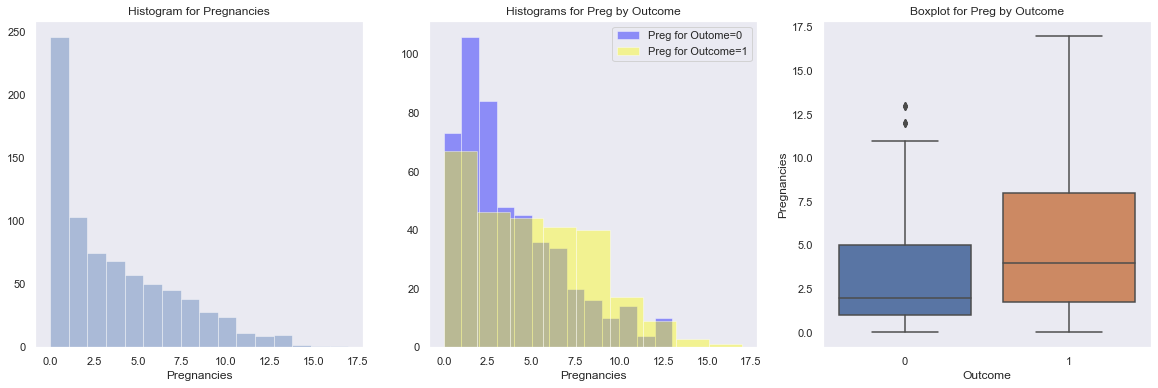

In [35]:
# lets visualise Pregnancies vs Outcome
# creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.set_style("dark")
sns.distplot(MiniProjectDiabetes.Pregnancies, kde=False)
plt.title("Histogram for Pregnancies")
plt.subplot(1,3,2)
sns.distplot(diabetes_negative.Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.distplot(diabetes_positive.Pregnancies,kde=False,color ="Yellow", label = "Preg for Outcome=1")
plt.title("Histograms for Preg by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=MiniProjectDiabetes.Outcome,y=MiniProjectDiabetes.Pregnancies)
plt.title("Boxplot for Preg by Outcome")
plt.show()

Visually, we can see the data is right skewed. A large proportion of the participants have had zero pregnancies.
When looking at the histogram of Pregnancies by Outcome superimposed on each other, it looks like there is a case for the hypothesis  women with more than 6 pregnancies are more likely to be diabetic
In the boxplots, we find a few outliers in both sets. Example some non-diabetic women have had many pregenancies. I wouldn’t be worried.

In [51]:
# validating the hypothesis using the chi-square test
# generate a cross tabulation with Pregnancy and Outcome
preg_vs_out = pd.crosstab(MiniProjectDiabetes.Pregnancies,MiniProjectDiabetes.Outcome)
preg_vs_out

Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


In [52]:
# from the above tabulation we can see that there are 5 or less women, with number of pregnancies > 11 and since
# for a chi square test you need the frequency to be  >= 5 hence we shall ignore rows 12 to 17
preg_vs_out = preg_vs_out[preg_vs_out.index <= 10]
preg_vs_out


Outcome,0,1
Pregnancies,,
0,73,38
1,106,29
2,84,19
3,48,27
4,45,23
5,36,21
6,34,16
7,20,25
8,16,22


In [53]:
# number of rows 
r = 11
# number of columns 
c = 2
# degrees of freedom 
df = 10
# observed values ov = preg_vs_out.values
ov = preg_vs_out.values
ov

array([[ 73,  38],
       [106,  29],
       [ 84,  19],
       [ 48,  27],
       [ 45,  23],
       [ 36,  21],
       [ 34,  16],
       [ 20,  25],
       [ 16,  22],
       [ 10,  18],
       [ 14,  10]])

In [61]:
chi2_critical_value = st.chi2.isf(0.05,df)
print(f'Chi2 Critical value is {chi2_critical_value}')
print("Chi2 Statistic: {}\nPvalue: {}".format(*st.chi2_contingency(preg_vs_out,correction=False)[:2]))
#st.chi2_contingency(preg_vs_out,correction=False)

Chi2 Critical value is 18.30703805327515
Chi2 Statistic: 52.16743656524961
Pvalue: 1.0624917116233169e-07


Conclusion
Lets recap our hypothesis:

Our Null hypothesis H0: Pregnancies and Outcome are not related
Our Alternative hypothesis H1: Pregnancies and Outcome are related

Since our chi-square calculated value is greater than the chi-square critical value, we can reject 
our null hypothesis i.e the Alternative hypothesis H1 is accepted